Load Cancer Dataset

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# Load Dataset

# X_train=pd.read_csv('../../../Fase3_Train_Input.csv').to_numpy()
# y_train=pd.read_csv('../../../Fase3_Train_Targets.csv').to_numpy().flatten()
# X_test=pd.read_csv('../../../Fase3_Test_Input.csv').to_numpy()
# y_test=pd.read_csv('../../../Fase3_Test_Targets.csv').to_numpy().flatten()

X1=pd.read_csv('../../../Fase3_Train_Input.csv')
X2=pd.read_csv('../../../Fase3_Test_Input.csv')
y1=pd.read_csv('../../../Fase3_Train_Targets.csv')
y2=pd.read_csv('../../../Fase3_Test_Targets.csv')
Data=pd.concat([X1, X2]).to_numpy()
Targets=pd.concat([y1, y2]).to_numpy().flatten()

# X1=pd.read_csv('../../../Fase3_Train_Input.csv').to_numpy()
# y1=pd.read_csv('../../../Fase3_Train_Targets.csv').to_numpy().flatten()
# Data=X1
# Targets=y1

Particionar Data Set

In [24]:
from sklearn.model_selection import train_test_split

print(type(Data),type(Targets),sep="----")
print(Data.shape,Targets.shape,sep="----")

X_train, X_test, y_train, y_test = train_test_split(Data, Targets,
                  train_size=0.7, test_size=0.3, stratify=Targets, shuffle=True)
                  # El parámetro stratify asegura la partición balanceada

print("X_train shape: {}".format(X_train.shape))  
print("y_test :", y_train)

# X es una matriz, y es un vector
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

<class 'numpy.ndarray'>----<class 'numpy.ndarray'>
(450, 13)----(450,)
X_train shape: (315, 13)
y_test : ['medicamento3' 'medicamento2' 'medicamento1' 'medicamento3'
 'medicamento1' 'medicamento1' 'medicamento2' 'medicamento2'
 'medicamento1' 'medicamento2' 'medicamento1' 'medicamento1'
 'medicamento2' 'medicamento2' 'medicamento2' 'medicamento3'
 'medicamento3' 'medicamento1' 'medicamento1' 'medicamento2'
 'medicamento1' 'medicamento1' 'medicamento2' 'medicamento3'
 'medicamento2' 'medicamento3' 'medicamento2' 'medicamento1'
 'medicamento2' 'medicamento1' 'medicamento2' 'medicamento1'
 'medicamento1' 'medicamento1' 'medicamento1' 'medicamento2'
 'medicamento2' 'medicamento1' 'medicamento1' 'medicamento1'
 'medicamento3' 'medicamento2' 'medicamento3' 'medicamento2'
 'medicamento1' 'medicamento3' 'medicamento2' 'medicamento2'
 'medicamento2' 'medicamento3' 'medicamento1' 'medicamento2'
 'medicamento3' 'medicamento1' 'medicamento1' 'medicamento2'
 'medicamento1' 'medicamento1' 'medicamen

Building the Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier(max_depth=2, random_state=0) 
# criterion {“gini”, “entropy”, “log_loss”}, 
#rfc = RandomForestClassifier(criterion='entropy' ,max_depth=2, random_state=0)
#rfc = RandomForestClassifier(max_depth=10,random_state=0 )
#rfc = RandomForestClassifier(class_weight='balanced', max_depth=10,random_state=0 )

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)


#Predicting the model on training and test sets.
y_train_pred_rfc = rfc.predict(X_train)
y_test_pred_rfc = rfc.predict(X_test)

#Performance of the model with the accuracy score function

from sklearn.metrics import accuracy_score

rfc_train = accuracy_score(y_train, y_train_pred_rfc)
rfc_test = accuracy_score(y_test, y_test_pred_rfc)

print(f"Random Forest train / test accuracies: {rfc_train: .3f} / {rfc_test: .3f}")


Random Forest train / test accuracies:  1.000 /  1.000


___
Confusion Matrix 
---
Test Data Set : Random Forest Classifier

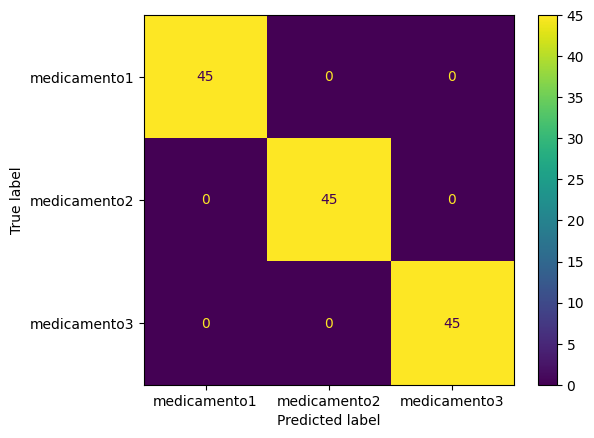

Text(0.5, 1.0, 'Confusion Matrix:  Test - Random Forest')

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array(['medicamento1','medicamento2','medicamento3']).flatten())
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - Random Forest')

---
Feature Selection with Random Forest
---
Without Optimizer

In [27]:
importances = rfc.feature_importances_
#display(importances)

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
#display(sorted_indices)

# Dataset Features Names 
# h_mean,s_mean,v_mean
feat_labels=np.array(['h_mean', 's_mean', 'v_mean', 'mask_meanb', 'mask_meang', 'mask_meany', 'mask_meanrd', 'mask_meanrl', 'mask_stdb', 'mask_stdg', 'mask_stdy', 'mask_stdrd', 'mask_stdrl']).flatten()
# display(cancer_ds.feature_names) 

# Display Features Names list  by importances ordre
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
    

 1) mask_meang                     0.176401
 2) mask_meany                     0.165677
 3) mask_stdg                      0.147353
 4) mask_stdy                      0.145661
 5) mask_meanrd                    0.106431
 6) mask_stdrd                     0.094246
 7) h_mean                         0.064264
 8) mask_stdrl                     0.031334
 9) s_mean                         0.025432
10) mask_meanrl                    0.021284
11) mask_stdb                      0.015338
12) mask_meanb                     0.005574
13) v_mean                         0.001006


---
Visualize Feature Importance

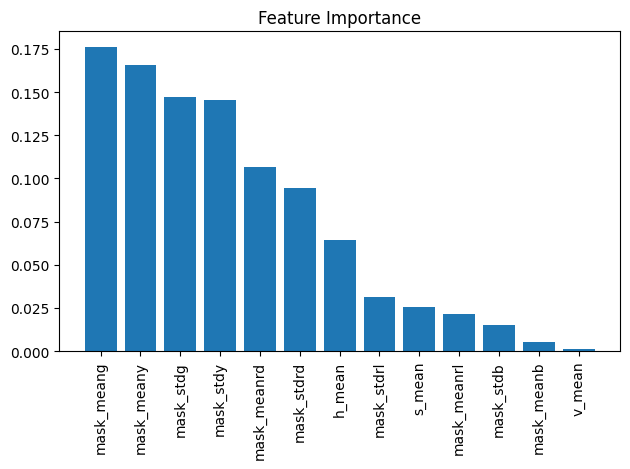

In [28]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()